In [2]:
import os
import pandas as pd
import sys
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
from sodapy import Socrata


path = os.path.abspath('')


https://opendata.fcc.gov/resource/hicn-aujz.json

In [3]:
#Get PUMA to FIPS conversion
puma_path = path+'\\static-data\\tract-to-puma.txt'

tracts = pd.read_csv(puma_path)

tracts[0:20]

,STATEFP,COUNTYFP,TRACTCE,PUMA5CE
0,1,1,20100,2100
1,1,1,20200,2100
2,1,1,20300,2100
3,1,1,20400,2100
4,1,1,20500,2100
5,1,1,20600,2100
6,1,1,20700,2100
7,1,1,20801,2100
8,1,1,20802,2100
9,1,1,20900,2100


In [4]:
#Grab raw data
fcc_path = path+'\\static-data\\Fixed_Broadband_Deployment_Data__December_2020.csv'

fcc_data = pd.read_csv(fcc_path)

fcc_data[:20]

C:\Users\Jude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Logical Record Number,Provider ID,FRN,Provider Name,DBA Name,Holding Company Name,Holding Company Number,Holding Company Final,State,Census Block FIPS Code,Technology Code,Consumer,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps),Business
0,9472563,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
1,9472564,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
2,9472565,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
3,9472566,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
4,9472567,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
5,9472568,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
6,9472569,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
7,9472570,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
8,9472571,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
9,9472572,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0


In [10]:
cleaned_cols = fcc_data.copy()[['Provider Name','State','Census Block FIPS Code','Technology Code','Consumer','Max Advertised Downstream Speed (mbps)','Business']]

cleaned_cols['Census Block FIPS Code'] = cleaned_cols['Census Block FIPS Code'].astype(str)

cleaned_cols[:20]

,Provider Name,State,Census Block FIPS Code,Technology Code,Consumer,Max Advertised Downstream Speed (mbps),Business
0,"ViaSat, Inc.",MD,240378759011017.0,60.0,1.0,35.0,1.0
1,"ViaSat, Inc.",MD,240378759011018.0,60.0,1.0,35.0,1.0
2,"ViaSat, Inc.",MD,240378759011019.0,60.0,1.0,35.0,1.0
3,"ViaSat, Inc.",MD,240378759011020.0,60.0,1.0,35.0,1.0
4,"ViaSat, Inc.",MD,240378759011021.0,60.0,1.0,35.0,1.0
5,"ViaSat, Inc.",MD,240378759011022.0,60.0,1.0,35.0,1.0
6,"ViaSat, Inc.",MD,240378759011023.0,60.0,1.0,35.0,1.0
7,"ViaSat, Inc.",MD,240378759011024.0,60.0,1.0,35.0,1.0
8,"ViaSat, Inc.",MD,240378759011025.0,60.0,1.0,35.0,1.0
9,"ViaSat, Inc.",MD,240378759011026.0,60.0,1.0,35.0,1.0


In [11]:
highestRows = cleaned_cols.groupby('Census Block FIPS Code')['Max Advertised Downstream Speed (mbps)'].max()

highestRows[:20]

Census Block FIPS Code
100010401001000.0    1000.0
100010401001001.0    1000.0
100010401001002.0    1000.0
100010401001003.0    1000.0
100010401001004.0    1000.0
100010401001005.0    1000.0
100010401001006.0    1000.0
100010401001007.0      25.0
100010401001008.0      25.0
100010401001009.0    1000.0
100010401001010.0    1000.0
100010401001011.0    1000.0
100010401001012.0    1000.0
100010401001013.0    1000.0
100010401001014.0    1000.0
100010401001015.0      25.0
100010401001016.0    1000.0
100010401001017.0    1000.0
100010401001018.0    1000.0
100010401001019.0    1000.0
Name: Max Advertised Downstream Speed (mbps), dtype: float64

In [28]:
print(len(highestRows))

df = pd.DataFrame(highestRows)

df[df['Max Advertised Downstream Speed (mbps)'] < 50]

11050948


,Max Advertised Downstream Speed (mbps)
Census Block FIPS Code,
100010401001007.0,25.0
100010401001008.0,25.0
100010401001015.0,25.0
100010401001026.0,25.0
100010401001029.0,25.0
...,...
90159081002044.0,25.0
90159081002045.0,25.0
90159081002046.0,25.0


C:\Users\Jude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

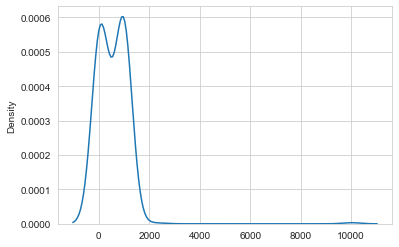

In [31]:

sns.set_style('whitegrid')

sns.kdeplot(np.array(df['Max Advertised Downstream Speed (mbps)']), bw=0.5)
